In [11]:
f_func <- "./functions.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_func, '--to=script', '--stdout'), stdout = TRUE)))

f_data_loading <- "./data_loading.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_data_loading, '--to=script', '--stdout'), stdout = TRUE)))

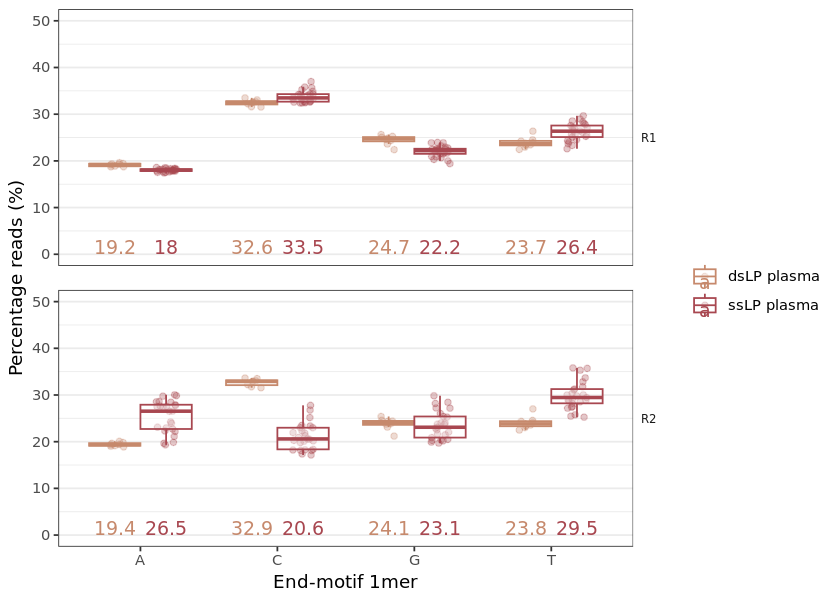

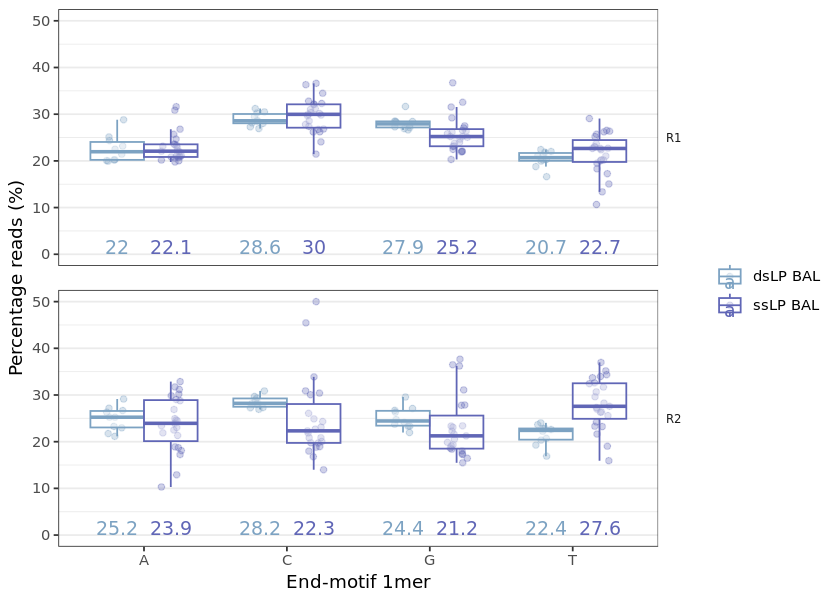

In [12]:
options(repr.plot.width=7, repr.plot.height=5)
for (sel_sample in c("plasma", "BAL")){
    host_nonMT_motif_all <- host_nonMT_endX %>% 
        filter(sample == sel_sample)  %>% 
        ggplot(aes(x = EndX, y = nsCount, color = sample_type)) + 
            geom_jitter(alpha = 0.3, position = position_jitterdodge(jitter.width = 0.15)) +  # Added alpha for transparency
            geom_boxplot(alpha = 0.4, outlier.shape = NA, position = position_dodge(width = 0.75)) +  # Position dodge for alignment
            facet_grid(rows = vars(read)) + 
            theme_bw() + ylim(0,50) + 
            scale_color_manual(values = c("dsLP plasma" = "#C6896C", "ssLP plasma" = "#A84750", 
                                         "dsLP BAL" = "#7CA2C2", "ssLP BAL" = "#6066B6")) +
            geom_text(
                data = . %>% group_by(sample_type, EndX, read) %>% summarise(median_nsCount = median(nsCount, na.rm = TRUE),
                       sd_nsCount = sd(nsCount, na.rm = TRUE), .groups = 'drop'),
                aes(x = EndX, y = 0, label = paste0(round(median_nsCount, 1))),
                position = position_dodge(width = 0.75), size = 4, vjust = 0 ) + 
            labs(x = "End-motif 1mer", y = "Percentage reads (%)", color = "") + 
            theme(strip.background = element_rect(color = "white", fill = "white"), 
                panel.grid.major.x = element_blank(),
                panel.grid.minor.x = element_blank(),
                strip.text.x = element_text(size = 7), 
                panel.spacing = unit(1, "lines"), 
                strip.text.y = element_text(angle = 0, size = 7, hjust = 0))   
    host_nonMT_motif_all %>% print()

    ggsave(paste0("../../output_figures/host_nonMT_", sel_sample,"_motif_endX_all.png"), plot = host_nonMT_motif_all, 
               width = 7, height = 5)
    ggsave(paste0("../../output_figures/host_nonMT_", sel_sample,"_motif_endX_all.pdf"), plot = host_nonMT_motif_all, 
               width = 7, height = 5)
}

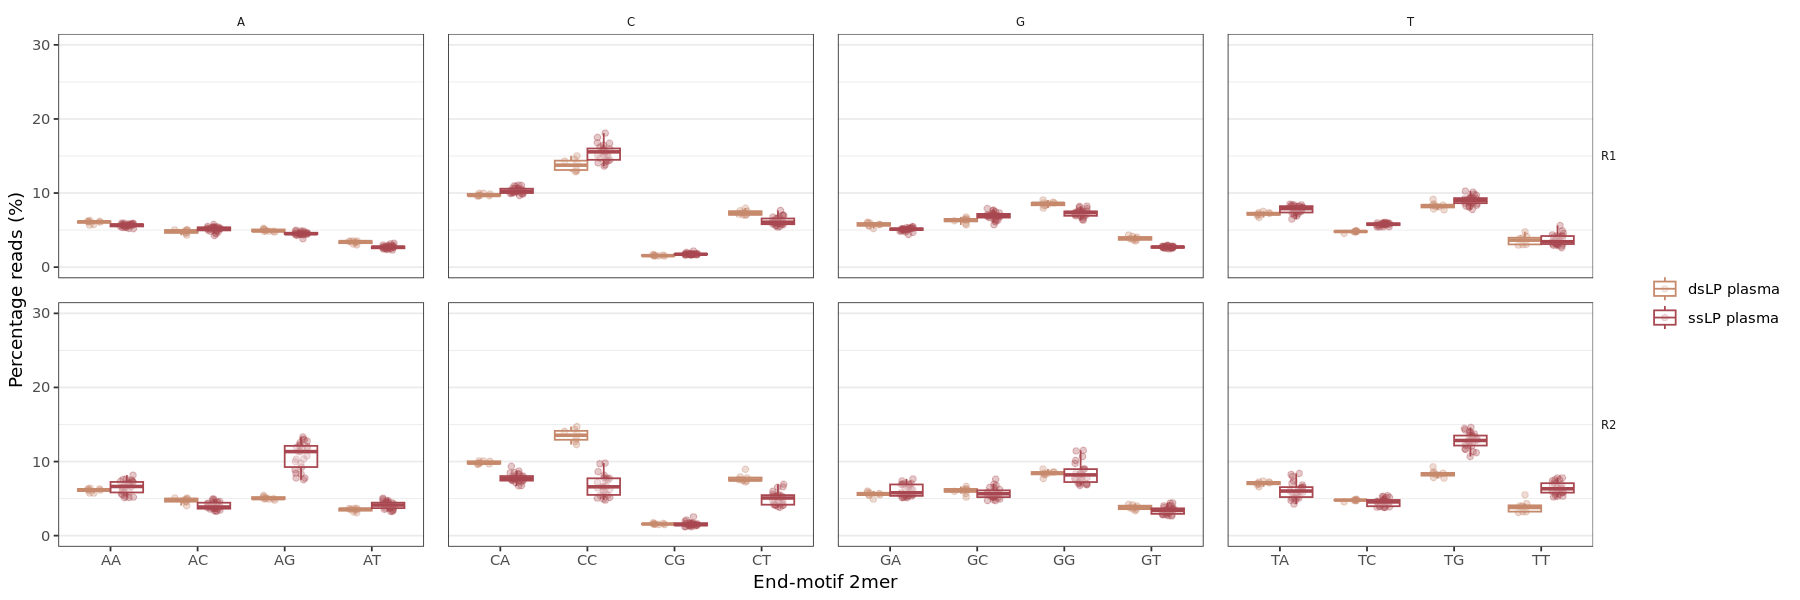

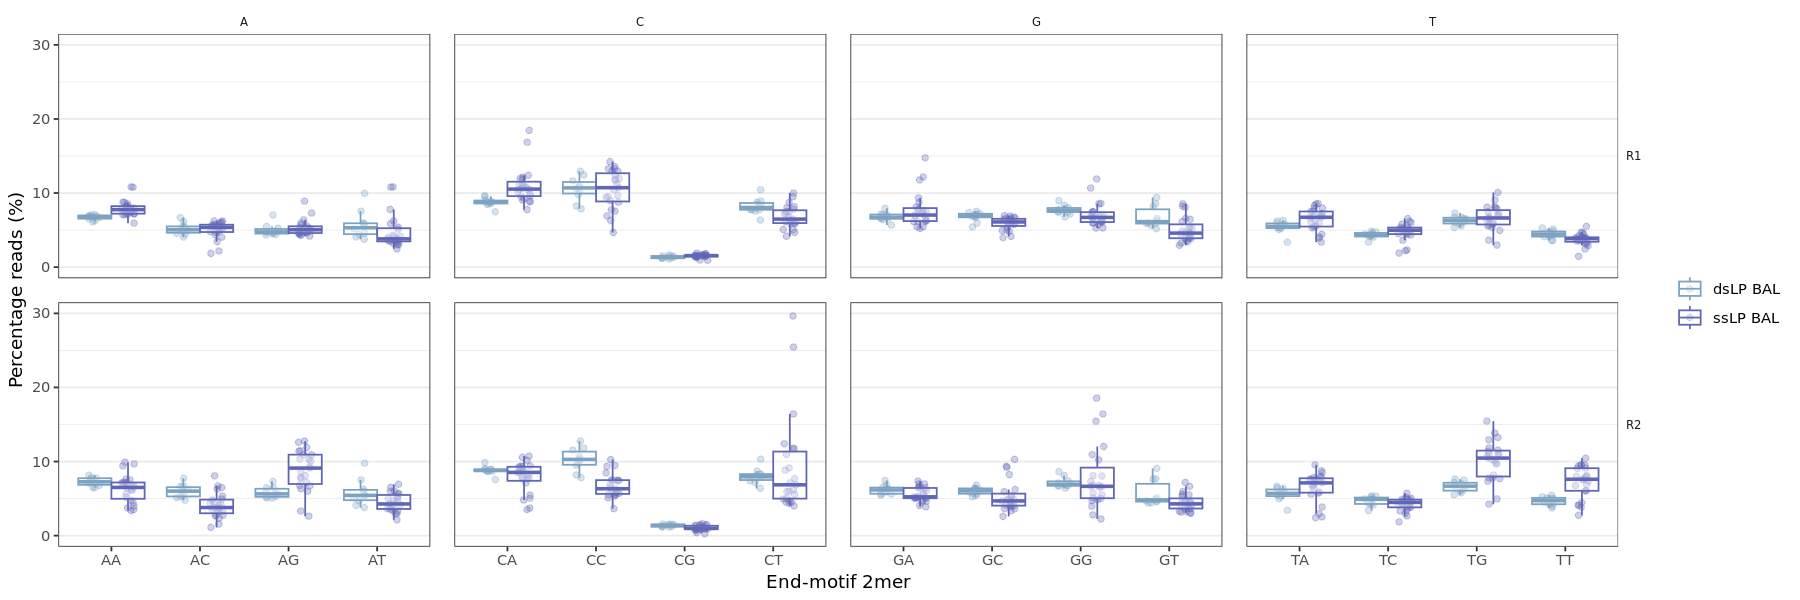

In [32]:
options(repr.plot.width=15, repr.plot.height=5)
for (sel_sample in c("plasma", "BAL")){
    host_nonMT_motif_all <- host_nonMT_endXX %>% 
        filter(sample == sel_sample)  %>% 
        ggplot(aes(x = EndXX, y = nsCount, color = sample_type)) + 
            geom_jitter(alpha = 0.3, position = position_jitterdodge(jitter.width = 0.15)) +  # Added alpha for transparency
            geom_boxplot(alpha = 0.4, outlier.shape = NA, position = position_dodge(width = 0.75)) +  # Position dodge for alignment
            facet_grid(rows = vars(read), cols = vars(EndX), scales="free", space="free_x") + 
            theme_bw() + ylim(0,30) +
            scale_color_manual(values = c("dsLP plasma" = "#C6896C", "ssLP plasma" = "#A84750", 
                                         "dsLP BAL" = "#7CA2C2", "ssLP BAL" = "#6066B6")) +
            labs(x = "End-motif 2mer", y = "Percentage reads (%)", color = "") + 
            theme(strip.background = element_rect(color = "white", fill = "white"), 
                panel.grid.major.x = element_blank(),
                panel.grid.minor.x = element_blank(),
                strip.text.x = element_text(size = 7), 
                panel.spacing = unit(1, "lines"), 
                strip.text.y = element_text(angle = 0, size = 7, hjust = 0))   
    host_nonMT_motif_all %>% print()

    ggsave(paste0("../../output_figures/host_nonMT_", sel_sample,"_motif_endXX_all.png"), plot = host_nonMT_motif_all, 
               width = 15, height = 5)
    ggsave(paste0("../../output_figures/host_nonMT_", sel_sample,"_motif_endXX_all.pdf"), plot = host_nonMT_motif_all, 
               width = 15, height = 5)
}